#Question 1
Follow the Python code and comments below to create AND, OR perceptrons.

##AND Perceptron

In [2]:
import pandas as pd

# TODO: Set weight1, weight2, and bias to create an AND perceptron
weight1 = 0.1
weight2 = 0.1
bias = -0.2

# Test code. Do not change anything below.
TestingData = [(0, 0), (0, 1), (1, 0), (1, 1)]
ModelAnswer = [False, False, False, True]
outputs = []

for testingdata, modelanswer in zip(TestingData, ModelAnswer):
    linear_combination = weight1 * testingdata[0] + weight2 * testingdata[1] + bias
    output = int(linear_combination >= 0)
    flag = 'Yes' if output == modelanswer else 'No'
    outputs.append([testingdata[0], testingdata[1], linear_combination, output, flag])

num_incorrect = len([output[4] for output in outputs if output[4] == 'No'])
output_dataframe = pd.DataFrame(outputs, columns=['Input 1', 'Input 2', 'Linear Combination', 'Activation Output', 'Correct?'])
if not num_incorrect:
    print('Great!  You created an AND perceptron!\n')
else:
    print('You got {} wrong,  keep it up!\n'.format(num_incorrect))
print(output_dataframe.to_string(index=False))

Great!  You created an AND perceptron!

 Input 1  Input 2  Linear Combination  Activation Output Correct?
       0        0                -0.2                  0      Yes
       0        1                -0.1                  0      Yes
       1        0                -0.1                  0      Yes
       1        1                 0.0                  1      Yes


C:\Users\jimmy\AppData\Local\Temp\ipykernel_26836\4132628947.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


##OR Perceptron

In [3]:
import pandas as pd

# TODO: Set weight1, weight2, and bias to create an OR perceptron
weight1 = 0.1
weight2 = 0.1
bias = -0.1

# Test code. Do not change anything below.
TestingData = [(0, 0), (0, 1), (1, 0), (1, 1)]
ModelAnswer = [False, True, True, True]
outputs = []

for testingdata, modelanswer in zip(TestingData, ModelAnswer):
    linear_combination = weight1 * testingdata[0] + weight2 * testingdata[1] + bias
    output = int(linear_combination >= 0)
    flag = 'Yes' if output == modelanswer else 'No'
    outputs.append([testingdata[0], testingdata[1], linear_combination, output, flag])

num_incorrect = len([output[4] for output in outputs if output[4] == 'No'])
output_dataframe = pd.DataFrame(outputs, columns=['Input 1', 'Input 2', 'Linear Combination', 'Activation Output', 'Correct?'])
if not num_incorrect:
    print('Great!  You created an OR perceptron!\n')
else:
    print('You got {} wrong,  keep it up!\n'.format(num_incorrect))
print(output_dataframe.to_string(index=False))

Great!  You created an OR perceptron!

 Input 1  Input 2  Linear Combination  Activation Output Correct?
       0        0                -0.1                  0      Yes
       0        1                 0.0                  1      Yes
       1        0                 0.0                  1      Yes
       1        1                 0.1                  1      Yes


#Question 2

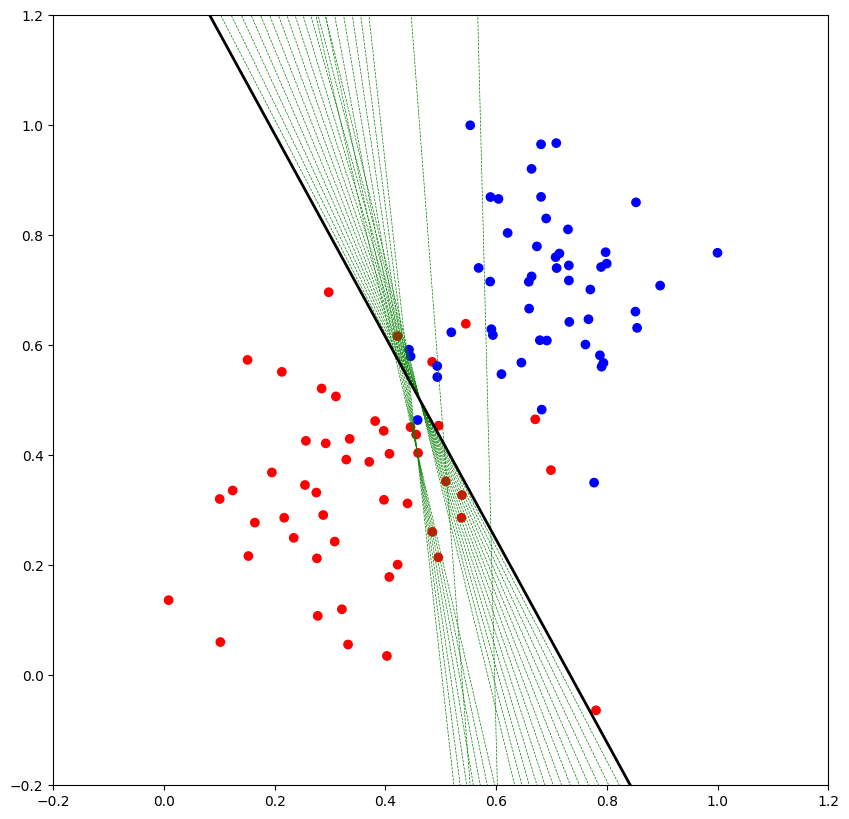

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Change the file path
data = pd.read_csv('In-class4Q2.csv', header = None)

# In this trainning dataset, the first two columns of the csv file are x1 and x2, respectively.
# The final column is y.
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

# Some basic setup

np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# function to update weights and bias for finding best decision boundary
def perceptronStep(X, y, W, b, learn_rate = 0.01):

    for i in range(len(X)):
        y_pred = prediction(X[i], W, b)
        if y_pred != y[i]:
            
            if y_pred == 1 and y[i] == 0:
                W -= learn_rate * X[i].reshape(-1, 1)
                b -= learn_rate
            elif y_pred == 0 and y[i] == 1:
                W += learn_rate * X[i].reshape(-1, 1)
                b += learn_rate

    return W, b

# train model till end of epochs
# save all decision boundary to observe the training process
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

x1 = X[:, 0]
x2 = X[:, 1]

boundary_lines = trainPerceptronAlgorithm(X, y)
x_lin = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.scatter(x1, x2, marker='o', color=['red' if value == 1 else 'blue' for value in y])
for i, line in enumerate(boundary_lines):
    zo, z1  = line
    if i == len(boundary_lines) - 1:
        c, ls, lw = 'k', '-', 2
    else:
        c, ls, lw = 'g', '--', 0.5
    ax.plot(x_lin, zo * x_lin + z1, c=c, ls=ls, lw=lw)
plt.show()